# **Seaborn**

## **Indroduction**

*   Seaborn is a Python data visualization library based on matplotlib.
*   It provides a high-level interface for drawing attractive and informative statistical graphics.
*   Seaborn helps us to explore and understand data.
*   Its plotting functions operate on dataframes and arrays containing whole datasets.





### **Installation**



In [ ]:
!pip install seaborn

## **Seaborn Versus Matplotlib**

*   **`Functionality`** : Seaborn contains a number of patterns and plots for data visualization with varity of themes. It helps in compiling whole data into a single plot. Whereas Matplotlib is used for making basic graphs. Datasets are visualised with the help of bargraphs, histograms, piecharts, scatter plots, lines.
*   **`Dealing Multiple Figures`** : Seaborn sets time for the creation of each figure. Whereas Matplotlib can open and use multiple figures simultaneously. However they are closed distinctly.
*   **`Syntax`** : Seaborn uses comparatively simple syntax whereas Matplotlib uses comparatively complex and lengthy syntax. 





Here is an example of a *simple random-walk plot* in Matplotlib. It uses its classic plot formatting and colors.

Importing required libraries:

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

Libraries used here are:

> ***np.random.RandomState() :*** Generates random data from sample.

> ***np.linspace(0, 10, 500) :*** Return evenly spaced numbers over a specified interval. Here, interval is 0-10 and it has to generate 500 samples.

> ***np.cumsum(rng.randn(500, 6), 0) :*** Return the cumulative sum of the elements along a given axis. Here, axis is 0.



Creating Random Walk Data:

In [ ]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

Libraries used here are:

> ***plt.plot() :*** Plot y versus x as lines and/or markers.

> ***plt.legend() :*** Place a legend on the axes. A legend is an area describing the elements of the graph. Loc in legend() is used to specify the location of the legend. ncols specifies number of columns in legend.

Ploting matplotlib graph:

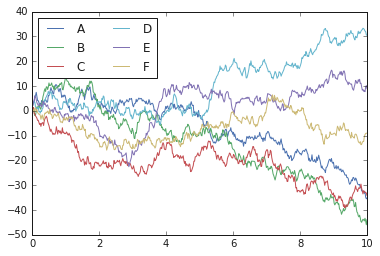

In [ ]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Although the result contains all the information we'd like it to convey, it does so in a way that is not all that pleasing, and it looks bit old-fashioned.

Now, lets see working of seaborn:

Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output.

By convention, Seaborn is imported as **sns**. 

> ***sns.set() :*** Set the style.

In [ ]:
import seaborn as sns
sns.set()

Now let's rerun the same two lines as before

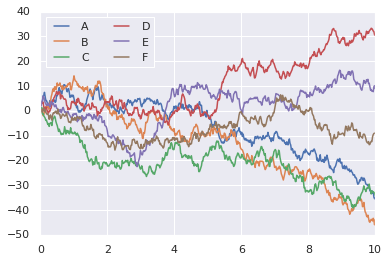

In [ ]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

## **Exploring Seaborn Plots**

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types. They are useful for statistical data exploration, and some statistical model fitting.

Ploting various types available in `seaborn`. These plots can be done using single line command in *Matplotlib* still *seaborn* APIs are more convenint.

### **Histograms, KDE, and densities**

*Statistical data visualization :* All we want is to plot histograms and joint distributions of variables.

Bellow is it's implementation using Matplotlib:

> ***np.random.multivariate_normal() :*** Draw random samples from a multivariate normal distribution. Here, [0,0] is mean, [[5, 2], [2, 2]] is covariance and size given is 2000.

> ***pd.DataFrame() :*** Creates dataFrame object. Here, ['x', 'y'] are column names for resulting frame.

> ***plt.hist() :*** Plots histogram.

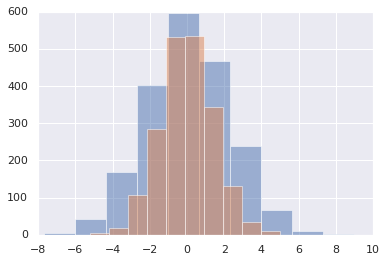

In [ ]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    #plt.hist(data[col], normed=True, alpha=0.5)
    plt.hist(data[col], alpha=0.5)

Here, using seaborn library function to get a smooth estimate of the distribution using a kernel density estimation.

> ***sns.kdeplot() :*** Plot univariate or bivariate distributions using kernel density estimation. KDE represents the data using a continuous probability density curve in one or more dimensions.

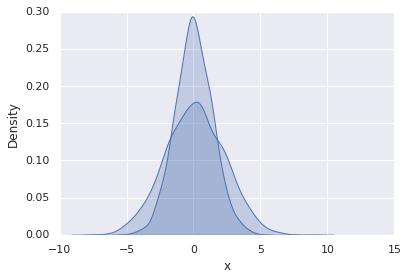

In [ ]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)


> ***sns.displot() :*** This function combines histogram plot and kdeplot plot.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


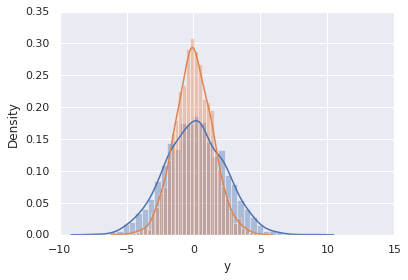

In [ ]:
sns.distplot(data['x'])
sns.distplot(data['y']);

If we pass the full two-dimensional dataset to `kdeplot`, we will get a two-dimensional visualization of the data:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


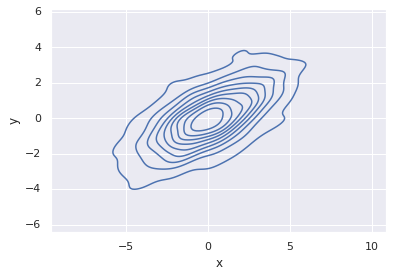

In [ ]:
#sns.kdeplot(data);
sns.kdeplot(data['x'],data['y']);

> ***sns.axes_style() :*** Setect style of plot

> ***sns.joinplot() :*** Draw multiple bivariate plots with univariate marginal distributions.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


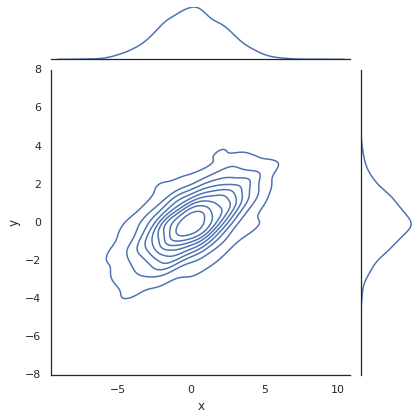

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

There are other parameters that can be passed to `jointplot`. Example we can use a hexagonally based histogram instead.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


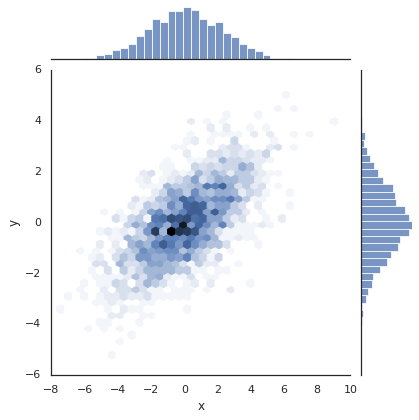

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

### **Pair Plots**

Pair Plots are a really simple way to visualize relationships between each variable. It produces a matrix of relationships between each variable in our data for an instant examination of our data. It can also be a great jumping off point for determining types of regression analysis to use. 

When we generalize joint plots to datasets of larger dimensions, we end up with pair plots. This is very useful for exploring correlations between multidimensional data.

Using iris dataset to demonstrate. It contains  lists measurements of petals and sepals of three iris species.

> ***sns.load_dataset() :*** Loads the dataset.

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


> ***sns.pairplot() :*** Plot pairwise relationships in a dataset. By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


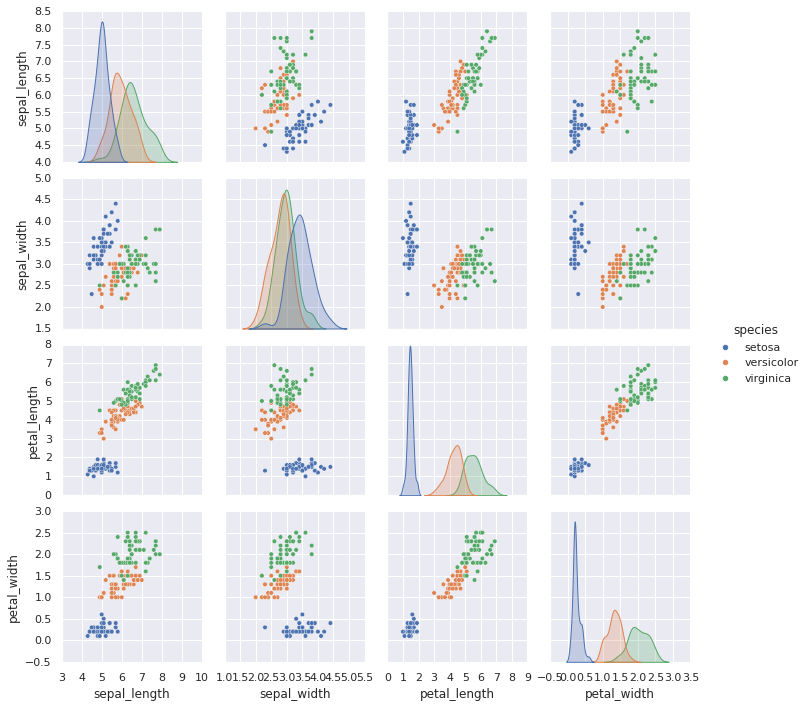

In [ ]:
sns.pairplot(iris, hue='species', size=2.5);

### **Faceted histograms**

We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


> ***sns.FacetGrid() :*** Multi-plot grid for plotting conditional relationships. This class maps a dataset onto multiple axes arrayed in a grid of rows and columns.

*Parameters :*

* *data :* Dataframe. Here, trips.
* *row :* Specifies row. String type.
* *columns :* Specifies column. String type.

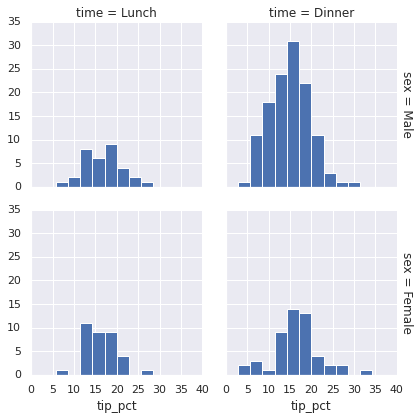

In [ ]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### **Factor plots**

Factor plots can be useful for this kind of visualization as well which allows us to view the distribution of a parameter within bins defined by any other parameter. 

A factor plot is simply the same plot generated for different response and factor variables and arranged on a single page.
The underlying plot generated can be any univariate or bivariate plot. The scatter plot is the most common application.

> ***sns.factorplot() :*** This method is used to draw a categorical plot onto a FacetGrid.

> ***set_axis_labels() :*** Sets lables to axis. Here, x-label is Day and y-label is Total Bill.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


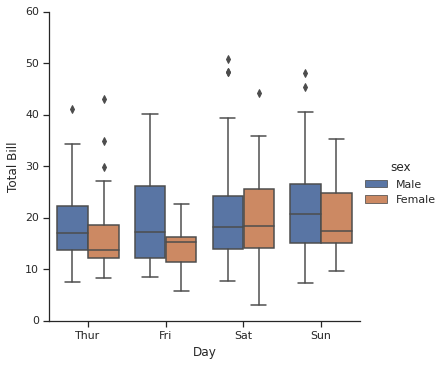

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### **Joint distributions**

Similar to the pairplot we saw earlier, we can use `sns.jointplot` to show the joint distribution between different datasets, along with the associated marginal distributions.

> ***sns.jointplot() :*** Draw a plot of two variables with bivariate and univariate graphs.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


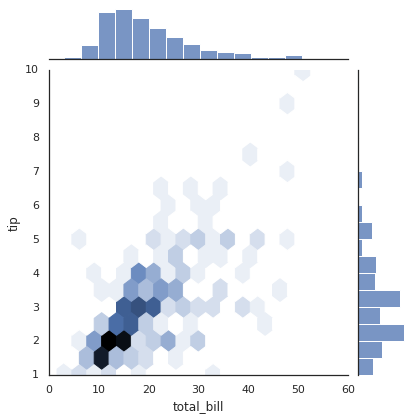

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

The joint plot can also do some automatic *kernel density estimation* and *regression.*

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


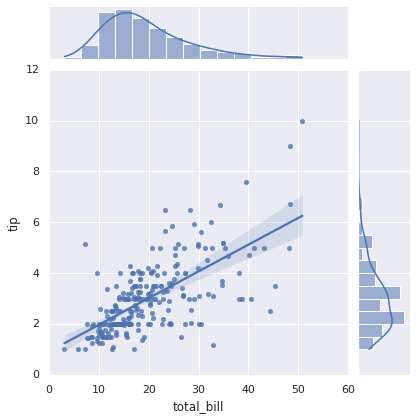

In [ ]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

### **Bar Plots**

Time series can be plotted using `sns.factorplot`.

Now, we are using planets data for implementation.

In [ ]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


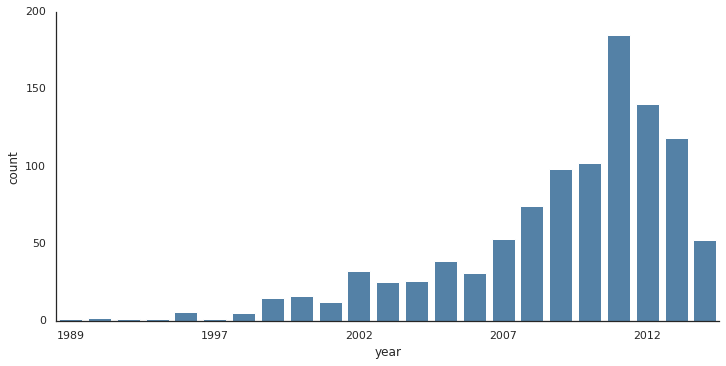

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2, kind="count", color='steelblue')
    g.set_xticklabels(step=5)              # to set x-labels

We can learn more by looking at the method of discovery of each of these planets.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


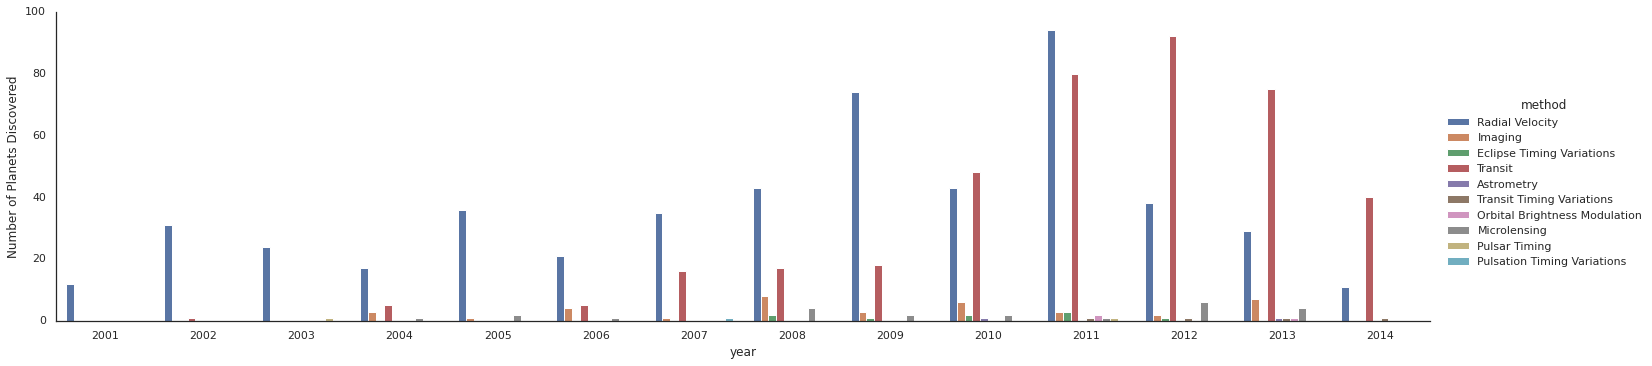

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count', hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')              # To set y-labels

## Example: Exploring Marathon Finishing Times

Here we'll look at using Seaborn to help visualize and understand finishing results from a marathon. 

Downloading the data from the Web:

In [ ]:
!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  836k  100  836k    0     0  2161k      0 --:--:-- --:--:-- --:--:-- 2167k


> ***pd.read_csv() :*** To read csv dataset using pandas.

In [ ]:
data = pd.read_csv('marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


***Note :*** By default pandas loaded the time columns as Python strings of type *objects*.

In [ ]:
data.dtypes           # To display datatypes of each column

age        int64
gender    object
split     object
final     object
dtype: object

Providing a converter for the times:

> ***pd.datetools.timedelta() :*** Timedeltas are differences in times, expressed in difference units, e.g. days, hours, minutes, seconds. They can be both positive and negative.

In [ ]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)
    #return pd.datetools.bday(d).apply(pd.datetime.now())


data = pd.read_csv('marathon-data.csv', converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [ ]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

We observe datatypes of *split* and *final* is changed to *timedelta64[ns]* which is more convenint for the purpose of our Seaborn plotting utilities. 

Add columns that give the times in seconds:

In [ ]:
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


To get an idea of what the data looks like, we can plot a `jointplot` over the data. 

> ***sns.jointplot() :*** Draw a plot of two variables with bivariate and univariate graphs. This function provides a convenient interface to the ‘JointGrid’ class, with several canned plot kinds.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


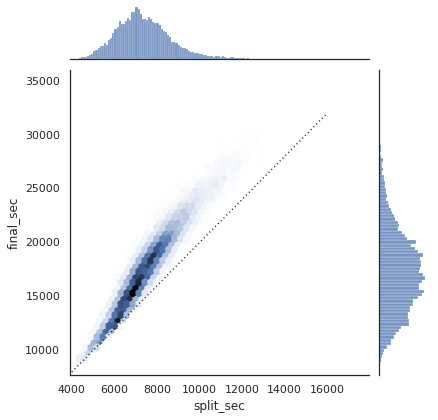

In [ ]:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000), np.linspace(8000, 32000), ':k')

**Observation :** 

* The dotted line shows where someone's time would lie if they ran the marathon at a perfectly steady pace. 
* The fact that the distribution lies above this indicates that most people slow down over the course of the marathon.
* Those who do the opposite—run faster during the second half of the race—are said to have "negative-split" the race.

Let's create another column in the data, the split fraction, which measures the degree to which each runner negative-splits or positive-splits the race.

In [ ]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


**Observation :**

* Where this split difference is less than zero, the person negative-split the race by that fraction.

Let's do a distribution plot of this split fraction:

> ***sns.distplot() :*** Show a histogram with a line on it. A distplot plots a univariate distribution of observations. The distplot() function combines the matplotlib hist function with the seaborn kdeplot() and rugplot() functions.

> ***plt.axvline() :*** Add a vertical line across the axes.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


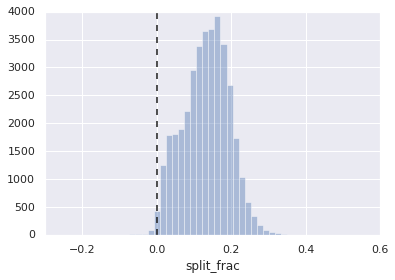

In [ ]:
sns.distplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [ ]:
sum(data.split_frac < 0)

251

**Observation :** 

* Out of nearly 40,000 participants, there were only 250 people who negative-split their marathon.

**Tasks :** To look whether there is any correlation between this split fraction and other variables. 

Using `PairGrid()` function:

> ***sns.PairGrid() :*** Subplot grid for plotting pairwise relationships in a dataset. Here, using it to find co-relation between datasets.

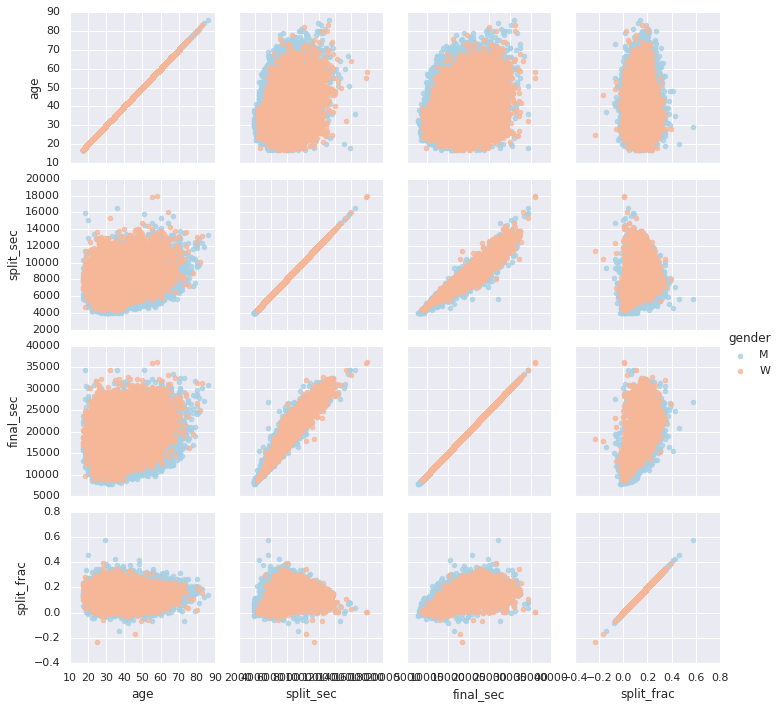

In [ ]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'], hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

**Observation :**

* It looks like the split fraction does not correlate particularly with age, but does correlate with the final time: faster runners tend to have closer to even splits on their marathon time.
* We see here that Seaborn is not remedy for Matplotlib's ills when it comes to plot styles: in particular, the x-axis labels overlap.

Here, we'll observe the difference between men and women. Looking at histogram of split fractions for these two groups.

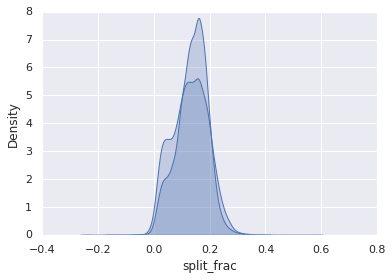

In [ ]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

**Obsrvation :**

* Their are many more men then women who are running close to even split.

Comparing distributions with `violinplot`:

> ***sns.violinplot() :*** Draw a combination of boxplot and kernel density estimate.  It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


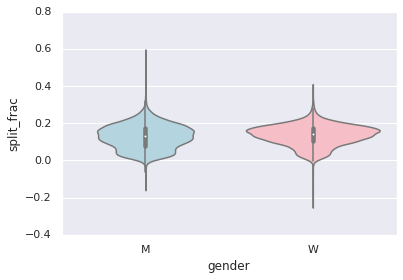

In [ ]:
sns.violinplot("gender", "split_frac", data=data, palette=["lightblue", "lightpink"]);

Another way to compare the distributions between men and women. Digging deeper and comparing these violin plots as a function of age.

*Step 1 :* Creating a new column in the array that specifies the decade of age that each person is in.

In [ ]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


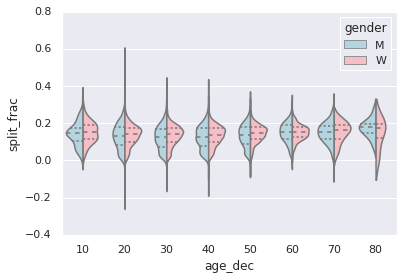

In [ ]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data, split=True, inner="quartile", palette=["lightblue", "lightpink"]);

**Observation :**

* The distributions of men and women differ: the split distributions of men in their 20s to 50s show a pronounced over-density toward lower splits when compared to women of the same age.
* The 80-year-old women seem to outperform everyone in terms of their split time. 

We can conclude that the old women outperform because we're estimating the distribution from small numbers, as there are only a handful of runners in that range:

In [ ]:
(data.age > 80).sum()

7

We'll use `regplot`, which will automatically fit a linear regression to the data.

> ***sns.lmplot() :*** Plot data and regression model fits across a FacetGrid.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


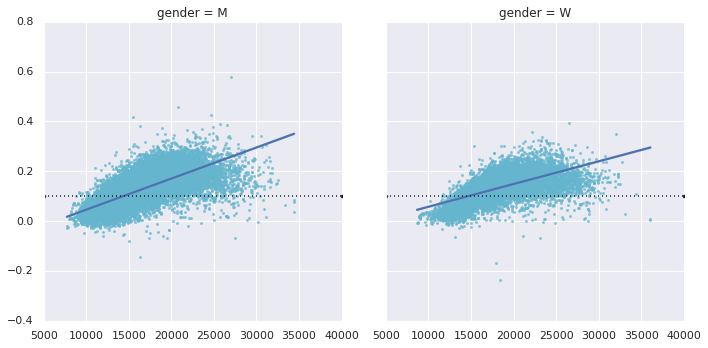

In [ ]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data, markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

**Observation :**

* The people with fast splits are the elite runners who are finishing within ~15,000 seconds, or about 4 hours.
*  People slower than that are much less likely to have a fast second split.

 # **Bokeh**

## **Introduction**

* Bokeh is an interactive visualization library for modern web browsers.
* It provides elegant, concise construction of versatile graphics, and affords high-performance interactivity over large or streaming datasets.
* *bokeh.models :* Low level interface. It provides great deal of flexibility to the application developer in developing visualizations.
* *bokeh.plotting :* This is a higher level interface that has functionality for composing visual glyphs.
* Bokeh can help anyone who would like to quickly and easily make interactive plots, dashboards, and data applications.

### **Installation**

In [ ]:
!!pip install seaborn

### **Plots with Glyhs**

Bokeh plots constructed using bokeh.plotting interface use a default set of tools and styles. However, it is possible to customize the styles using available plotting tools.

Importing required libraries:

In [ ]:
from bokeh.plotting import figure
figure(**kwargs)

Various Keywords used here are:

*	*x_axis_label :* Set title of x axis
*	*y_axis_label :* Set title for y axis
*	*plot_width :* Set width of figure
*	*plot_height :* Set height of figure

###  **1. Line Plot**

`Line plot` are plot is useful for visualizing the movements of points along the x-and y-axes in the form of a line. It is used to perform time series analytics.

> ***line() :*** line() method of object adds a line glyph to the Bokeh figure. Here, (x, y) are data arrays for showing their linear relationship.

Bellow are two simple demonstrations for *line plot*.

In [ ]:
from bokeh.plotting import figure, show
fig = figure()
fig.line(x,y)
show(fig)

In [ ]:
from bokeh.plotting import output_file
x = [1,2,3,4,5]
y = [2,4,6,8,10]
output_file('line.html')
fig = figure(title = 'Line Plot example', x_axis_label = 'x', y_axis_label = 'y')
fig.line(x,y)
show(fig)

### **2. Bar Plot**

`Bar Plot` is useful for indicating the count of each category of a particular column or field in your dataset.

We can draw two types of *Bar Plots* : 

a) **hbar() :** The bars are shown horizontally across plot width. 

*Parameters :*

* *height :* The heights of the vertical bars.
* *right :* The x coordinates of the right edges.
* *left :* The x coordinates of the left edges.

In [ ]:
fig = figure(plot_width = 400, plot_height = 200)
fig.hbar(y = [2,4,6], height = 1, left = 0, right = [1,2,3], color = "Cyan")
output_file('bar.html')
show(fig)

b) **vbar() :** The bars are shown vertically across plot height.

*Parameters :*

* *width :* The widths of the vertical bars.
* *top :* The y-coordinates of the top edges.
* *bottom :* The y-coordinates of the bottom edges.

In [ ]:
fig = figure(plot_width = 200, plot_height = 400)
fig.vbar(x = [1,2,3], width = 0.5, bottom = 0, top = [2,4,6], color = "Cyan")
output_file('bar.html')
show(fig)

### **3. Patch Plot**

`Patch plot` indicates a region of points in a particular shade of color. This type of plot is used to distinguish different groups within the same dataset. Two methods of *patch plot* are:

a) **patch() :** Adds patch glyph to given figure. Here, x-coordinate and y-coordinate are given as points of the patch.

In [ ]:
p = figure(plot_width = 300, plot_height = 300)
p.patch(x = [1, 3,2,4], y = [2,3,5,7], color = "green")
output_file('patch.html')
show(p)

b) **patches() :** Used to draw multiple polygonal patches. Here, x and y-coordinate are for all the patches which is given as list-of-lists.

In [ ]:
xs = [[5,3,4], [2,4,3], [2,3,5,4]]
ys = [[6,4,2], [3,6,7], [2,4,7,8]]
fig = figure()
fig.patches(xs, ys, fill_color = ['red', 'blue', 'black'], line_color = 'white')
output_file('patch_plot.html')
show(fig)

### **4. Scatter Markers**

`Scatter Markers` is used to determine the bi-variate relationship between two variables.

Various Keywords are:

* *x :*	values or field names of center x coordinates
* *y :*	values or field names of center y coordinates
* *size	:* values or field names of sizes in screen units
* *marker :* values or field names of marker types
* *color :*	set fill and line color

Following marker type constants are defined in Bokeh: −

- Asterisk
- Circle
- CircleCross
- CircleX
- Cross
- Dash
- Diamond
- DiamondCross
- Hex
- InvertedTriangle
- Square
- SquareCross
- SquareX
- Triangle
- X

In [ ]:
# Generatting scatter plot with cirle as a marker.
fig = figure()
fig.scatter([1, 4, 3, 2, 5], [6, 5, 2, 4, 7], marker = "circle", size = 20, fill_color = "grey")
output_file('scatter.html')
show(fig)

### **Area Plots**

Area plots are filled regions between two series that share a common index. Their are two methods of area plots:

a) **varea() :** Outputs vertical directed area.

*Parameters :*

* *area :* The x-coordinates for the points of the area.
* *y1 :* The y-coordinates for the points of one side of the area.
* *y2 :* The y-coordinates for the points of the other side of the area.

In [ ]:
fig = figure()
x = [1, 2, 3, 4, 5]
y1 = [2, 6, 4, 3, 5]
y2 = [1, 4, 2, 2, 3]
fig.varea(x = x,y1 = y1,y2 = y2)
output_file('area.html')
show(fig)

b) **harea() :** Outputs vertical directed area. 

*Parameters :*

* *x1 :* The x-coordinates for the points of one side of the area.
* *x2 :* The x-coordinates for the points of the other side of the area.
* *y :* The y-coordinates for the points of the area.

In [ ]:
fig = figure()
y = [1, 2, 3, 4, 5]
x1 = [2, 6, 4, 3, 5]
x2 = [1, 4, 2, 2, 3]
fig.harea(x1 = x1,x2 = x2,y = y)
output_file('area.html')
show(fig)

### **Circle Glyphs**

* **circle() :** Adds a circle glyph
* **circle_cross() :** Adds circle glyph with a ‘+’ cross through the center.
* **circle_x() :** Adds circle with an ‘X’ cross through the center.

In [ ]:
plot = figure(plot_width = 300, plot_height = 300)
plot.circle(x = [1, 2, 3], y = [3,7,5], size = 20, fill_color = 'red')
plot.circle_cross(x = [2,4,6], y = [5,8,9], size = 20, fill_color = 'blue',fill_alpha = 0.2, line_width = 2)
plot.circle_x(x = [5,7,2], y = [2,4,9], size = 20, fill_color = 'green',fill_alpha = 0.6, line_width = 2)
show(plot)

### **Rectangle, Ovals and Polygons**

**rect(), square(), ellipse()** and **oval()** methods are used for drawing respective shapes. Parameters are added according to our need.

In [ ]:
fig = figure(plot_width = 300, plot_height = 300)
fig.rect(x = 10,y = 10,width = 100, height = 50, width_units = 'screen', height_units = 'screen')
fig.square(x = 2,y = 3,size = 80, color = 'red')
fig.ellipse(x = 7,y = 6, width = 30, height = 10, fill_color = None, line_width = 2)
fig.oval(x = 6,y = 6,width = 2, height = 1, angle = -0.4)
show(fig)

### **Wedges and Arcs**

* **arc() :** Draws a simple line arc based on x and y coordinates, start and end angles(in radians) and radius. 
* **wedge() :** Same properties as `arc()`.

Both have optional parameter to set directions.

In [ ]:
import math
fig = figure(plot_width = 300, plot_height = 300)
fig.arc(x = 3, y = 3, radius = 50, radius_units = 'screen', start_angle = 0.0, end_angle = math.pi/2)
fig.wedge(x = 3, y = 3, radius = 30, radius_units = 'screen',
start_angle = 0, end_angle = math.pi, direction = 'clock')
fig.annular_wedge(x = 3,y = 3, inner_radius = 100, outer_radius = 75,outer_radius_units = 'screen',
inner_radius_units = 'screen',start_angle = 0.4, end_angle = 4.5,color = "green", alpha = 0.6)
show(fig)

### **Specialised curves**

a) **beizer() :** Adds a Bézier curve. It is a parametric curve used in computer graphics. Other uses include the design of computer fonts and animation.

***Note :*** Default value for all parameters is None.

In [ ]:
x = 2
y = 4
xp02 = x+0.4
xp01 = x+0.1
xm01 = x-0.1
yp01 = y+0.2
ym01 = y-0.2
fig = figure(plot_width = 300, plot_height = 300)
fig.bezier(x0 = x, y0 = y, x1 = xp02, y1 = y, cx0 = xp01, cy0 = yp01,cx1 = xm01, cy1 = ym01, line_color = "red", line_width = 2)

b) **quadratic() :** Adds a parabola glyph to bokeh figure.

In [ ]:
x = 2
y = 4
xp02 = x + 0.3
xp01 = x + 0.2
xm01 = x - 0.4
yp01 = y + 0.1
ym01 = y - 0.2
x = x,
y = y,
xp02 = x + 0.4,
xp01 = x + 0.1,
yp01 = y + 0.2,
fig.quadratic(x0 = x, y0 = y, x1 = x + 0.4, y1 = y + 0.01, cx = x + 0.1, cy = y + 0.2, line_color = "blue", line_width = 3)

### **Setting Range**

Default ranges are always given to by Bokeh. But at some time we may want to change it's range. We can do this by assigning *x_range* and *y_range* properties to a figure() function.

In [ ]:
xrange = range1d(0,10)
fig = figure(x,y,x_range = xrange)

### **Axes**

#### **Categorical Axes**

The bokeh plots show numerical data along both x and y axes. In order to use categorical data along either of axes, we need to specify a FactorRange to specify categorical dimensions for one of them.

A simple bar plot is displayed showing number of students enrolled for various courses offered.

In [ ]:
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
fig = figure(x_range = langs, plot_width = 300, plot_height = 300)
fig.vbar(x = langs, top = students, width = 0.5)
show(fig)

To show each bar in different colour, set color property of `vbar()` function to list of color values.

In [1]:
cols = ['red','green','orange','navy', 'cyan']
fig.vbar(x = langs, top = students, color = cols,width=0.5)

NameError: name 'fig' is not defined

To render a vertical (or horizontal) stacked bar using `vbar_stack()` or `hbar_stack()` function.

*Example :* Sales is a dictionary showing sales figures of three products in three months.

In [ ]:
products = ['computer','mobile','printer']
months = ['Jan','Feb','Mar']
sales = {'products':products, 'Jan':[10,40,5], 'Feb':[8,45,10], 'Mar':[25,60,22]}
cols = ['red','green','blue']#,'navy', 'cyan']
fig = figure(x_range = products, plot_width = 300, plot_height = 300)
fig.vbar_stack(months, x = 'products', source = sales, color = cols,width = 0.5)
show(fig)

**dodge() :** It introduces a relative offset for each bar plot thereby achieving a visual impression of group.

Here, vbar() glyph is separated by an offset of 0.25 for each group of bars for a particular month.

In [ ]:
from bokeh.transform import dodge
products = ['computer','mobile','printer']
months = ['Jan','Feb','Mar']
sales = {'products':products, 'Jan':[10,40,5], 'Feb':[8,45,10], 'Mar':[25,60,22]}
fig = figure(x_range = products, plot_width = 300, plot_height = 300)
fig.vbar(x = dodge('products', -0.25, range = fig.x_range), top = 'Jan', width = 0.2,source = sales, color = "red")
fig.vbar(x = dodge('products', 0.0, range = fig.x_range), top = 'Feb', width = 0.2, source = sales,color = "green")
fig.vbar(x = dodge('products', 0.25, range = fig.x_range), top = 'Mar', width = 0.2,source = sales,color = "blue")
show(fig)

#### **Log Scale Axes**

When values on one of the axes of a plot grow exponentially with linearly increasing values of another, it is often necessary to have the data on former axis be displayed on a log scale.

Bellow example shows plot between x and 10x on a linear scale.

In [ ]:
x = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y = [10**i for i in x]
fig = figure(title = 'Linear scale example',plot_width = 400, plot_height = 400)
fig.line(x, y, line_width = 2)
show(fig)

Bellow figure obtained shows where y_axis_type is set to 'log'.

In [ ]:
fig = figure(title = 'Linear scale example',plot_width = 400, plot_height = 400, y_axis_type = "log")

#### **Twin Axes**

It may be needed to show multiple axes representing varying ranges on a single plot figure. The figure object can be so configured by defining extra_x_range and extra_y_range properties.

In [ ]:
from numpy import pi, arange, sin, linspace
x = arange(-2*pi, 2*pi, 0.1)
y = sin(x)
y2 = linspace(0, 100, len(y))
from bokeh.plotting import output_file, figure, show
from bokeh.models import LinearAxis, Range1d
fig = figure(title='Twin Axis Example', y_range = (-1.1, 1.1))
fig.line(x, y, color = "red")
fig.extra_y_ranges = {"y2": Range1d(start = 0, end = 100)}
fig.add_layout(LinearAxis(y_range_name = "y2"), 'right')
fig.line(x, y2, color = "blue", y_range_name = "y2")
show(fig)

### **Annotations and Legends**

`Annotations` are pieces of explanatory text added to the diagram.

In [ ]:
import numpy as np
import math
x = np.arange(0, math.pi*2, 0.05)
y = np.sin(x)
fig = figure(title = "sine wave example", x_axis_label = 'angle', y_axis_label = 'sin')
fig.line(x, y,line_width = 2)
show(p)

Adding legends to the plot figure:

In [ ]:
x = np.arange(0, math.pi*2, 0.05)
fig = figure()
fig.line(x, np.sin(x),line_width = 2, line_color = 'navy', legend = 'sine')
fig.circle(x,np.cos(x), line_width = 2, line_color = 'orange', legend = 'cosine')
fig.square(x,-np.sin(x),line_width = 2, line_color = 'grey', legend = '-sine')
show(fig)

### **Pandas**

In [ ]:
import pandas as pd
df = pd.read_csv('test.csv')
print(df)

The ‘x’ and ‘pow’ columns are used as data series for line glyph in bokeh plot figure.

In [ ]:
p = figure()
x = df['x']
y = df['pow']
p.line(x,y,line_width = 2)
p.circle(x, y,size = 20)
show(p)

### **ColumnDataSource**

A `ColumnDatasource` can be considered as a mapping between column name and list of data.

A Python dict object with one or more string keys and lists or numpy arrays as values is passed to `ColumnDataSource` constructor.

Following code generates a scatter plot using ColumnDataSource.

In [ ]:
from bokeh.models import ColumnDataSource
data = {'x':[1, 4, 3, 2, 5],
   'y':[6, 5, 2, 4, 7]}
cds = ColumnDataSource(data = data)
fig = figure()
fig.scatter(x = 'x', y = 'y',source = cds, marker = "circle", size = 20, fill_color = "grey")
show(fig)

Instead of assigning a Python dictionary to ColumnDataSource, we can use a Pandas DataFrame for it.

Let us use *test.csv* to obtain a DataFrame and use it for getting ColumnDataSource and rendering line plot.

In [ ]:
df = pd.read_csv('test.csv')
cds = ColumnDataSource(df)
fig = figure(y_axis_type = 'log')
fig.line(x = 'x', y = 'pow',source = cds, line_color = "grey")
show(fig)

### **Filtering Data**

`IndexFilter` is the simplest type of filter. We have to specify indices of only those rows from the dataset that we want to use while plotting the figure.

Following example demonstrates use of IndexFilter to set up a CDSView. The resultant figure shows a line glyph between x and y data series of the ColumnDataSource. A view object is obtained by applying index filter over it. The view is used to plot circle glyph as a result of IndexFilter.

In [ ]:
from bokeh.models import ColumnDataSource, CDSView, IndexFilter
from bokeh.plotting import figure, output_file, show
source = ColumnDataSource(data = dict(x = list(range(1,11)), y = list(range(2,22,2))))
view = CDSView(source=source, filters = [IndexFilter([0, 2, 4,6])])
fig = figure(title = 'Line Plot example', x_axis_label = 'x', y_axis_label = 'y')
fig.circle(x = "x", y = "y", size = 10, source = source, view = view, legend = 'filtered')
fig.line(source.data['x'],source.data['y'], legend = 'unfiltered')
show(fig)

To choose only those rows from the data source, that satisfy a certain Boolean condition, apply a BooleanFilter.

A typical Bokeh installation consists of a number of sample data sets in sampledata directory. 

For following example, we use unemployment1948 dataset provided in the form of unemployment1948.csv. It stores year wise percentage of unemployment in USA since 1948. We want to generate a plot only for year 1980 onwards. For that purpose, a CDSView object is obtained by applying BooleanFilter over the given data source.

In [ ]:
from bokeh.models import ColumnDataSource, CDSView, BooleanFilter
from bokeh.plotting import figure, show
from bokeh.sampledata.unemployment1948 import data
source = ColumnDataSource(data)
booleans = [True if int(year) >= 1980 else False for year in
source.data['Year']]
print (booleans)
view1 = CDSView(source = source, filters=[BooleanFilter(booleans)])
p = figure(title = "Unemployment data", x_range = (1980,2020), x_axis_label = 'Year', y_axis_label='Percentage')
p.line(x = 'Year', y = 'Annual', source = source, view = view1, color = 'red', line_width = 2)
show(p)

To add more flexibility in applying filter, Bokeh provides a `CustomJSFilter` class with the help of which the data source can be filtered with a user defined JavaScript function.

The example given below uses the same USA unemployment data. Defining a CustomJSFilter to plot unemployment figures of year 1980 and after.

In [ ]:
from bokeh.models import ColumnDataSource, CDSView, CustomJSFilter
from bokeh.plotting import figure, show
from bokeh.sampledata.unemployment1948 import data
source = ColumnDataSource(data)
custom_filter = CustomJSFilter(code = '''
   var indices = [];

   for (var i = 0; i < source.get_length(); i++){
      if (parseInt(source.data['Year'][i]) > = 1980){
         indices.push(true);
      } else {
         indices.push(false);
      }
   }
   return indices;
''')
view1 = CDSView(source = source, filters = [custom_filter])
p = figure(title = "Unemployment data", x_range = (1980,2020), x_axis_label = 'Year', y_axis_label = 'Percentage')
p.line(x = 'Year', y = 'Annual', source = source, view = view1, color = 'red', line_width = 2)
show(p)

### **Layouts**

* Bokeh visualizations can be suitably arranged in different layout options. 
* These layouts as well as sizing modes result in plots and widgets resizing automatically as per the size of browser window.

***Note :*** All items in a layout must have same sizing mode for consistence appearance.

***Note :*** The widgets are kept in a separate widget box and not in plot figure.

Following code produces two Bokeh figures and places them in a column layout so that they are displayed vertically. 

Line glyphs representing sine and cos relationship between x and y data series is displayed in Each figure.

In [ ]:
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import column
import numpy as np
import math
x = np.arange(0, math.pi*2, 0.05)
y1 = np.sin(x)
y2 = np.cos(x)
fig1 = figure(plot_width = 200, plot_height = 200)
fig1.line(x, y1,line_width = 2, line_color = 'blue')
fig2 = figure(plot_width = 200, plot_height = 200)
fig2.line(x, y2,line_width = 2, line_color = 'red')
c = column(children = [fig1, fig2], sizing_mode = 'stretch_both')
show(c)

The sine and cos curves as shown vertically in above diagram are now displayed horizontally in row layout with following code

In [ ]:
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import row
import numpy as np
import math
x = np.arange(0, math.pi*2, 0.05)
y1 = np.sin(x)
y2 = np.cos(x)
fig1 = figure(plot_width = 200, plot_height = 200)
fig1.line(x, y1,line_width = 2, line_color = 'blue')
fig2 = figure(plot_width = 200, plot_height = 200)
fig2.line(x, y2,line_width = 2, line_color = 'red')
r = row(children = [fig1, fig2], sizing_mode = 'stretch_both')
show(r)

The Bokeh package also has grid layout. It holds multiple plot figures (as well as widgets) in a two dimensional grid of rows and columns.

The grid() function too uses *children* and *sizing_mode* parameters where children is a list of lists. 

***Note :*** Each sublist is of same dimensions.

In the following code, four different relationships between x and y data series are plotted in a grid of two rows and two columns.

In [ ]:
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import gridplot
import math
x = list(range(1,11))

y1 = x
y2 =[11-i for i in x]
y3 = [i*i for i in x]
y4 = [math.log10(i) for i in x]

fig1 = figure(plot_width = 200, plot_height = 200)
fig1.line(x, y1,line_width = 2, line_color = 'blue')
fig2 = figure(plot_width = 200, plot_height = 200)
fig2.circle(x, y2,size = 10, color = 'green')
fig3 = figure(plot_width = 200, plot_height = 200)
fig3.circle(x,y3, size = 10, color = 'grey')
fig4 = figure(plot_width = 200, plot_height = 200, y_axis_type = 'log')
fig4.line(x,y4, line_width = 2, line_color = 'red')
grid = gridplot(children = [[fig1, fig2], [fig3,fig4]], sizing_mode = 'stretch_both')
show(grid)

### **Styling Visual Attributes**

The default appearance of a Bokeh plot can be customised by setting various properties to desired value. These properties are mainly of three types:

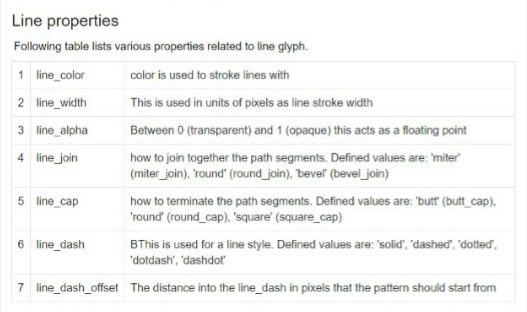

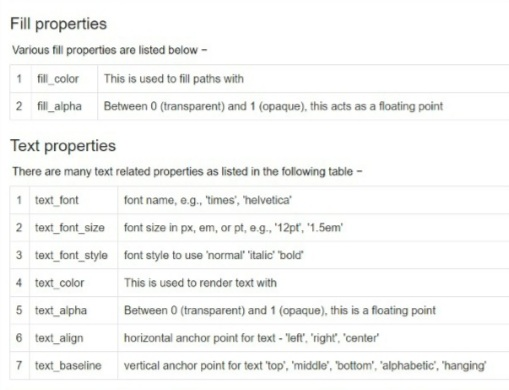

### **Customising legends**

Various glyphs in a plot can be identified by legend property appear as a label by default at top-right position of the plot area. This legend can be customised by following attributes-

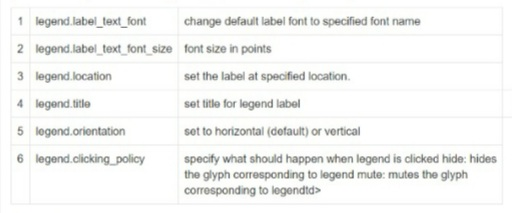

Example code for legend customisation:

In [ ]:
from bokeh.plotting import figure, output_file, show
import math
x2 = list(range(1,11))
y4 = [math.pow(i,2) for i in x2]
y2 = [math.log10(pow(10,i)) for i in x2]
fig = figure(y_axis_type = 'log')
fig.circle(x2, y2,size = 5, color = 'blue', legend = 'blue circle')
fig.line(x2,y4, line_width = 2, line_color = 'red', legend = 'red line')
fig.legend.location = 'top_left'
fig.legend.title = 'Legend Title'
fig.legend.title_text_font = 'Arial'
fig.legend.title_text_font_size = '20pt'
show(fig)